In [1]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [2]:
tf.test.gpu_device_name()

''

In [3]:
import keras
keras.__version__

'2.4.3'

In [11]:
from keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

In [6]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [7]:
print(train_targets.shape)

(404,)


In [12]:
mean = train_data.mean(axis=0)
std = train_data.std(axis = 0)

train_data = (train_data - mean) / std
X_test = (X_test - mean) / std

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets, test_size=0.2, random_state=2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

In [15]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation='relu', input_shape=(13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.summary()

boston.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'] )

Hist_boston = boston.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_valid, y_valid))

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 376.9075 - mae: 16.4687 - val_loss: 62.1509 - val_mae: 4.5738
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 28.7299 - mae: 3.8445 - val_loss: 37.3111 - val_mae: 3.3750
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 26.6134 - mae: 3.5145 - val_loss: 28.

In [20]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)
# 첫번째꺼는 loss 값, 뒤에꺼는 mae값

print(test_mse_score, test_mae_score)
print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 18.2851 - mae: 2.7818
18.28506088256836 2.7817983627319336
MAE is : 2.7817983627319336


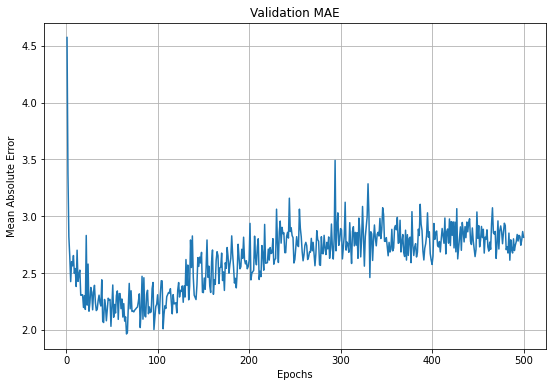

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

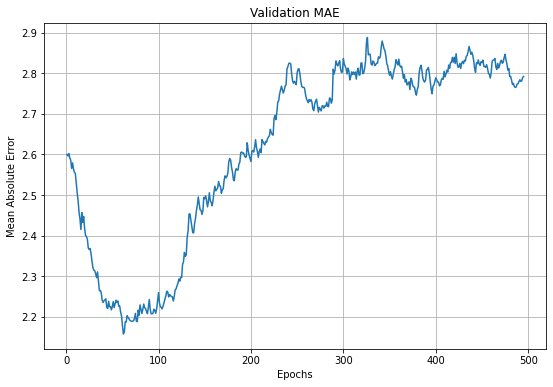

In [23]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * ( 1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']
mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize=(9,6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [27]:
from keras import backend as K

K.clear_session()

In [30]:
boston = models.Sequential(name = 'Earlystopping')
boston.add(layers.Dense(64, activation='relu', input_shape=(13,)))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse', optimizer='rmsprop', metrics=['mae'])

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_mae', mode = 'min', patience = 50, verbose=1)
mc =  ModelCheckpoint('best_boston.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)


Hist_boston = boston.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_valid, y_valid),
                         callbacks=[es,mc], verbose= 1)


Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 447.3059 - mae: 17.5047 - val_loss: 52.7231 - val_mae: 4.3975

Epoch 00001: val_mae improved from inf to 4.39748, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 32.5481 - mae: 3.9086 - val_loss: 30.6473 - val_mae: 3.5132

Epoch 00002: val_mae improved from 4.39748 to 3.51316, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 20.5310 - mae: 3.2217 - val_loss: 27.6345 - val_mae: 2.8809

Epoch 00003: val_mae improved from 3.51316 to 2.88090, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 13.4953 - mae: 2.5306 - val_loss: 24.4894 - val_mae: 2.8133

Epoch 00004: val_mae improved from 2.88090 to 2.81331, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 15.8084 - mae: 2.6910 - val_loss: 22.77

In [32]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [35]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print(test_mse_score, test_mae_score)
print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 13.7078 - mae: 2.3642
13.707751274108887 2.3642284870147705
MAE is : 2.3642284870147705
